In [1]:
# dataframe opertations - pandas
import pandas as pd
import numpy as np
import time 
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
health = pd.read_csv('../output/cut-data.csv',
    usecols=['dates','occupancy'], index_col='dates', parse_dates=True)
health
print(health.index.dtype)
health_resampled = health.resample('M').mean()
print(health_resampled.index.freq)


datetime64[ns]
<MonthEnd>


In [3]:
print(health.shape)
print(health.head())

(700, 1)
            occupancy
dates                
2017-05-01        139
2017-05-02        135
2017-05-03        133
2017-05-04        133
2017-05-05        135


<Axes: title={'center': 'occupancy Data'}, xlabel='dates'>

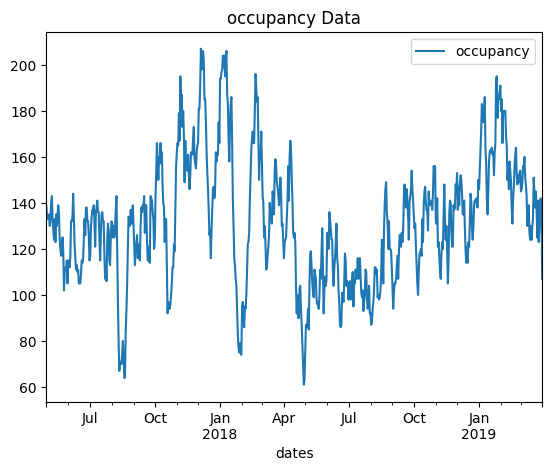

In [4]:

health[['occupancy']].plot(title='occupancy Data')

In [5]:
decompose_result = seasonal_decompose(health['occupancy'],model='multiplicative')

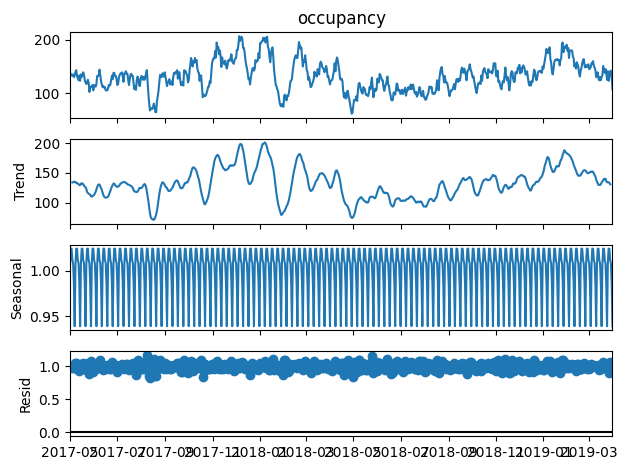

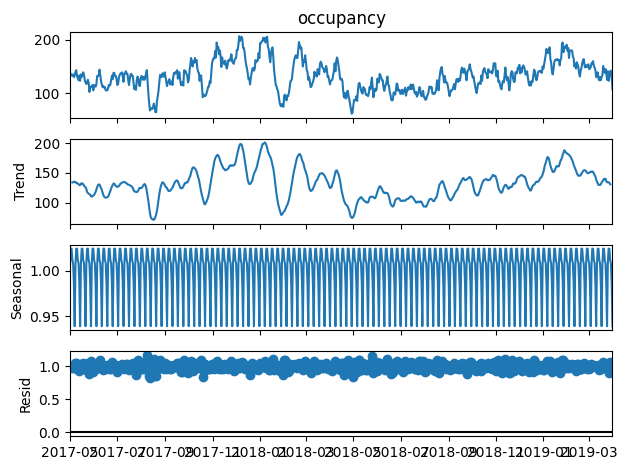

In [6]:
decompose_result.plot()

In [7]:
# Set the frequency of the date time index as Monthly start as indicated by the data
health.index.freq = 'D'
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)

<Axes: title={'center': 'Holt Winters Single Exponential Smoothing'}, xlabel='dates'>

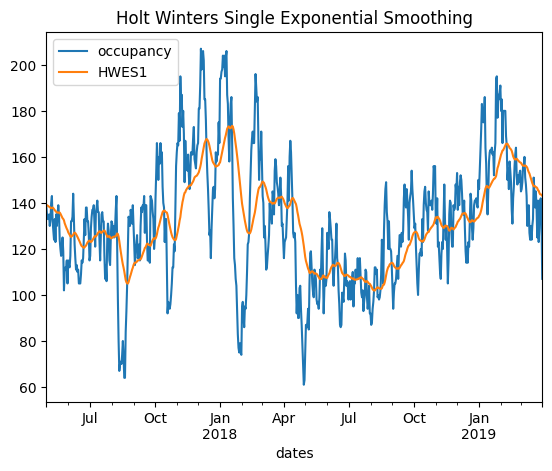

In [8]:
health['HWES1'] = SimpleExpSmoothing(health['occupancy']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
health[['occupancy','HWES1']].plot(title='Holt Winters Single Exponential Smoothing')

<Axes: title={'center': 'Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend'}, xlabel='dates'>

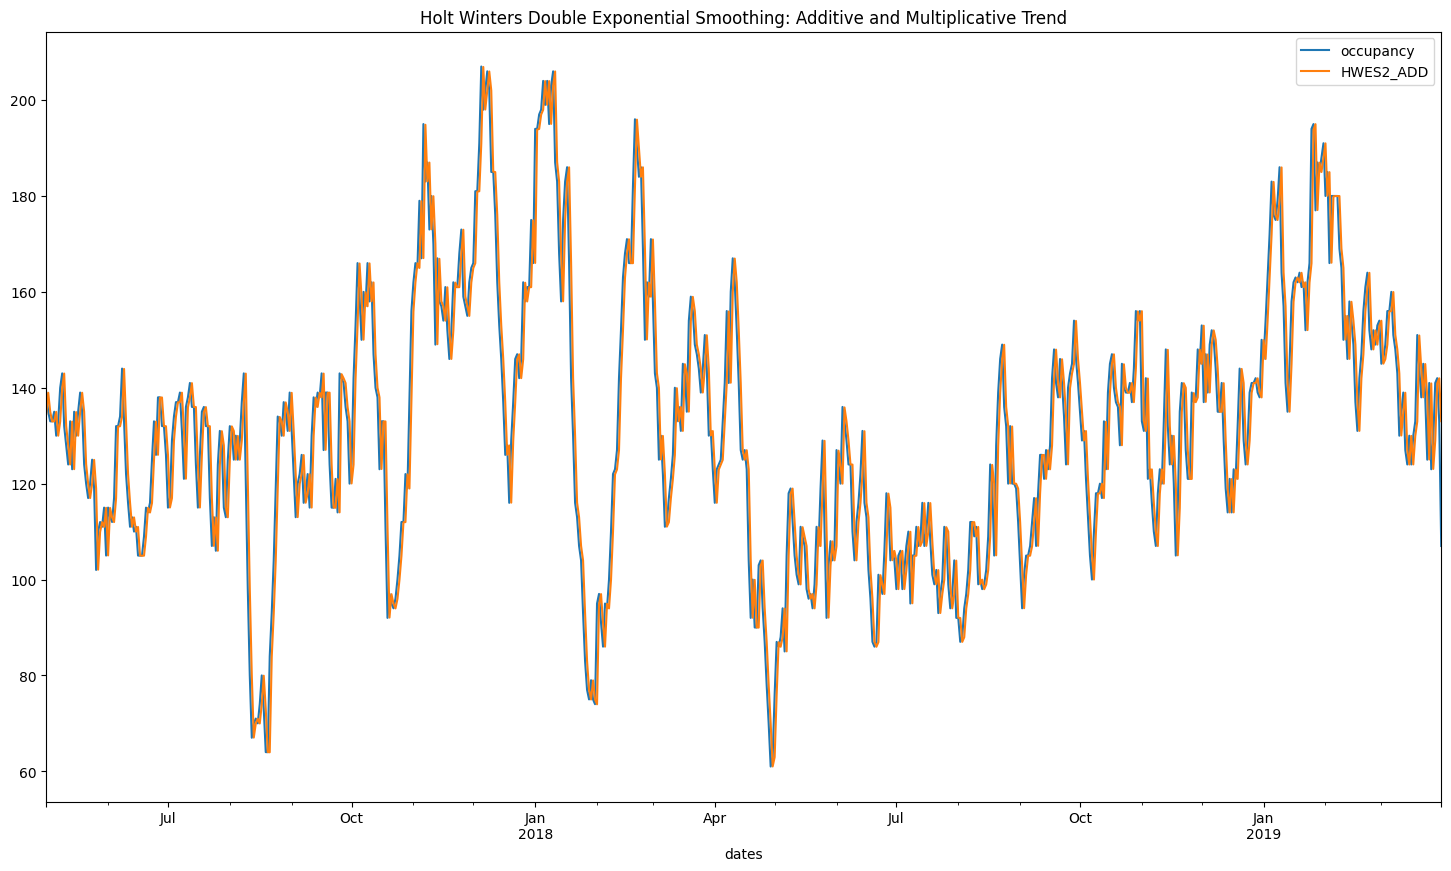

In [9]:
health['HWES2_ADD'] = ExponentialSmoothing(health['occupancy'],trend='add').fit().fittedvalues
health['HWES2_MUL'] = ExponentialSmoothing(health['occupancy'],trend='mul').fit()
health[['occupancy','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend',figsize=(18,10))

c:\Users\nguye\anaconda3\envs\py311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: title={'center': 'Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality'}, xlabel='dates'>

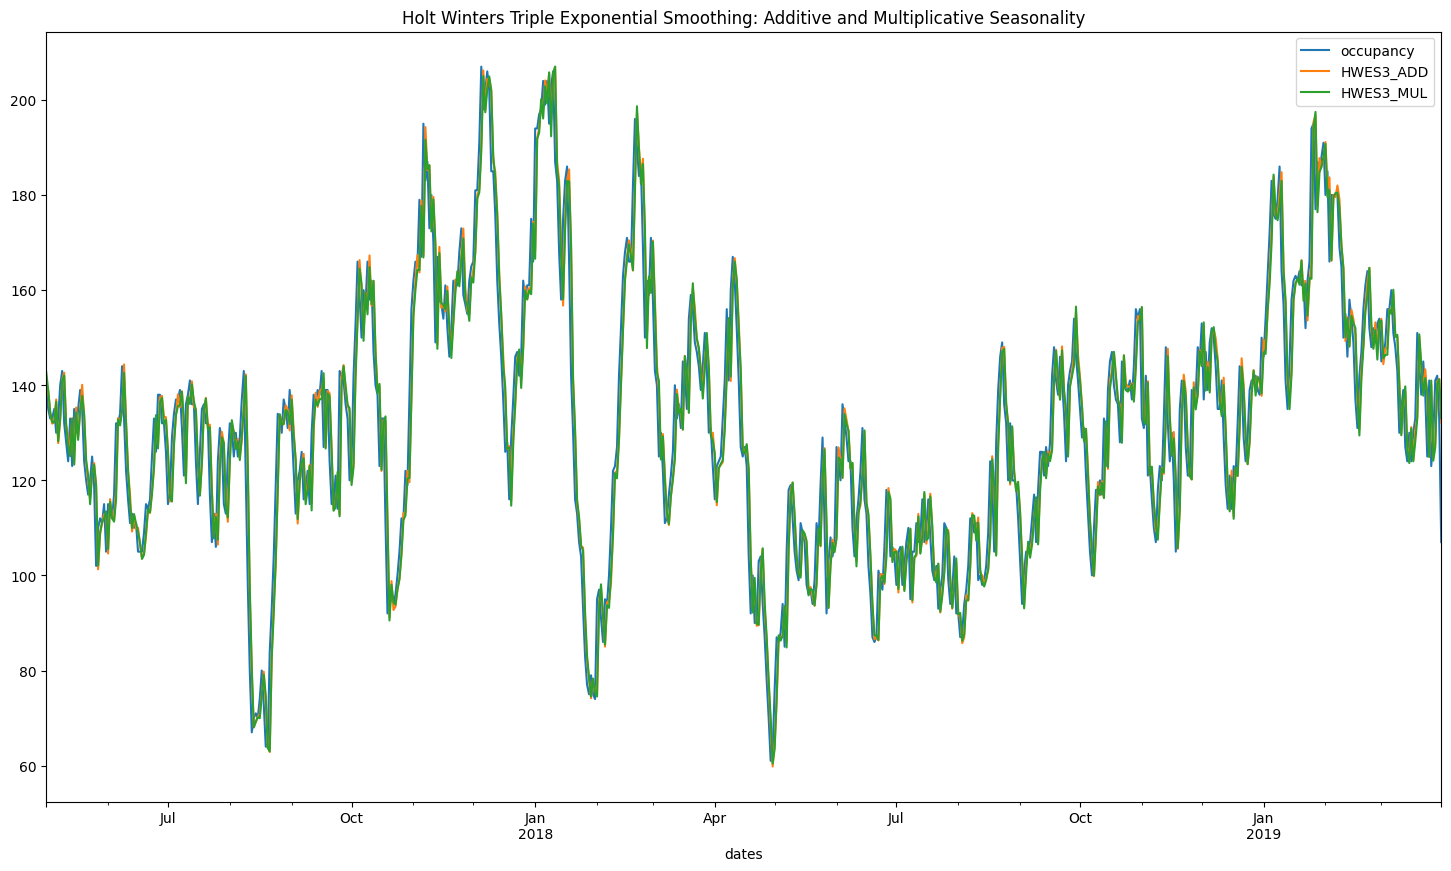

In [10]:
health['HWES3_ADD'] = ExponentialSmoothing(health['occupancy'],trend='add',seasonal='add',seasonal_periods=24).fit().fittedvalues
health['HWES3_MUL'] = ExponentialSmoothing(health['occupancy'],trend='mul',seasonal='mul',seasonal_periods=24).fit().fittedvalues
health[['occupancy','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality',figsize=(18,10))

In [65]:
health = pd.read_csv('../output/cut-data.csv',
    usecols=['dates','occupancy'], index_col='dates', parse_dates=True)
health.index.freq = 'D'
target_days = 30
holt_params = {
    'trend': 'mul', 
    'damped_trend': False,
    'seasonal': 'mul', 
    'seasonal_periods': 320, 
    'initialization_method': 
    'estimated'}
#train and test
train_health = health[0:len(health)-target_days]
test_health = health[len(health)-target_days:len(health)]

c:\Users\nguye\anaconda3\envs\py311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
c:\Users\nguye\anaconda3\envs\py311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

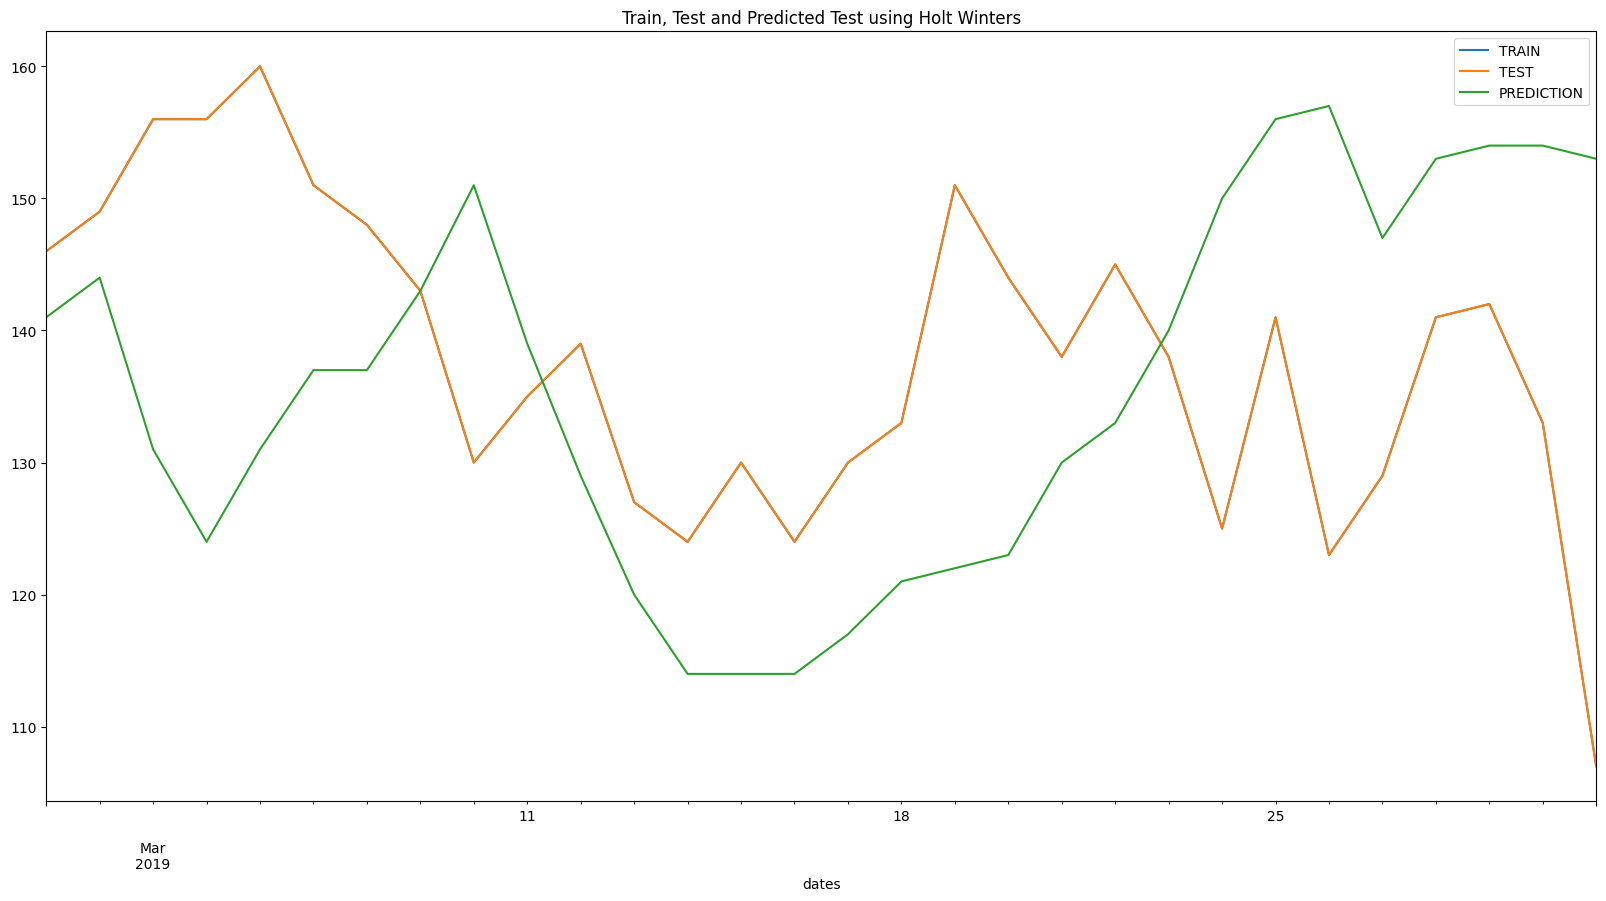

In [66]:
fitted_model = ExponentialSmoothing(train_health['occupancy'],**holt_params).fit()
test_predictions = fitted_model.forecast(target_days)
test_predictions = test_predictions.astype(int)
test_health['occupancy'].plot(legend=True,label='TRAIN')
test_health['occupancy'].plot(legend=True,label='TEST',figsize=(20,10))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')


<Axes: xlabel='dates'>

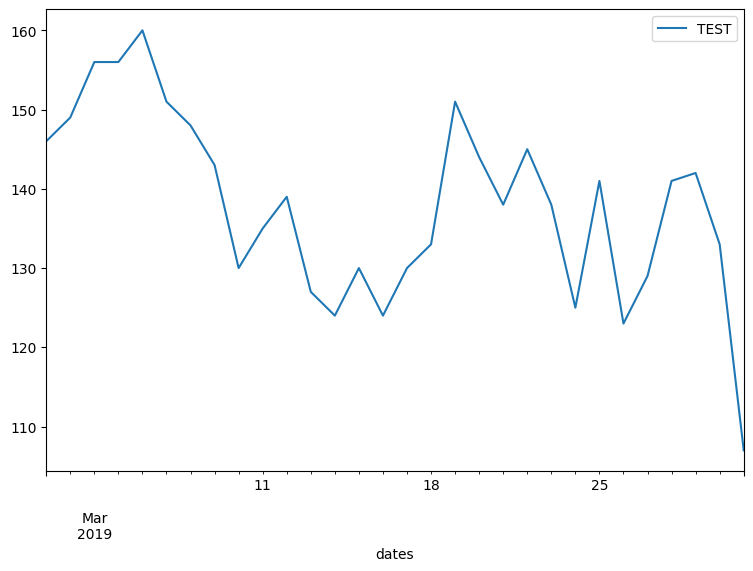

In [67]:
test_health['occupancy'].plot(legend=True,label='TEST',figsize=(9,6))
#test_predictions.plot(legend=True,label='PREDICTION',xlim=['1959–01–01','1961–01–01'])

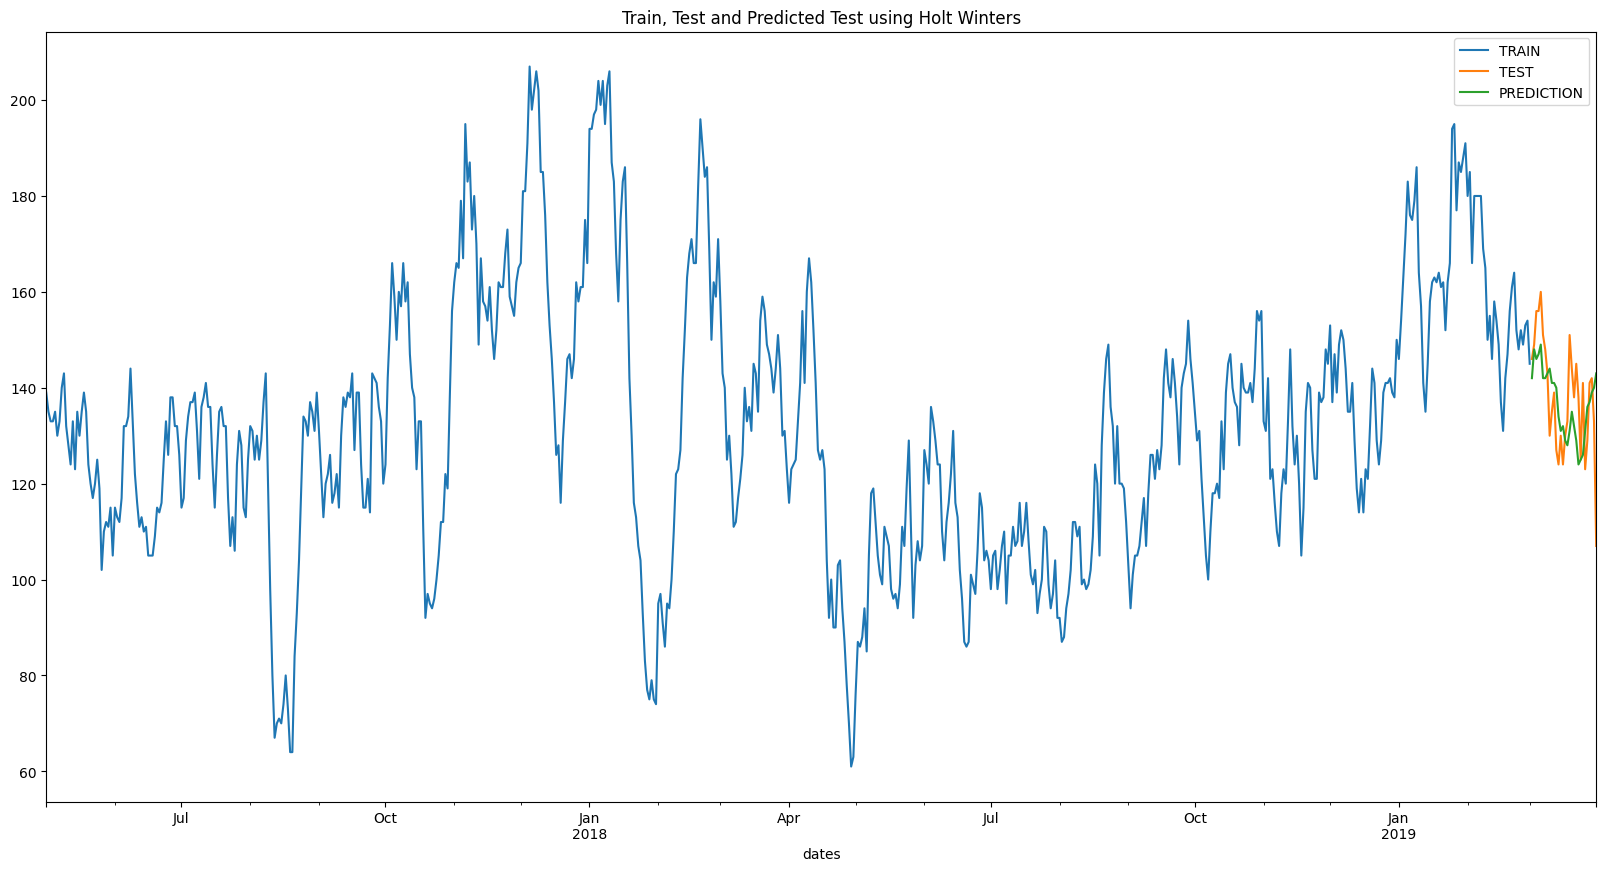

In [ ]:
plt.figure(figsize=(20, 10))  # Set the size of the plot

# Plot the training data
train_health['occupancy'].plot(legend=True, label='TRAIN')

# Plot the test data
test_health['occupancy'].plot(legend=True, label='TEST')

# Plot the predicted values
test_predictions.plot(legend=True, label='PREDICTION')

plt.title('Train, Test and Predicted Test using Holt Winters')
plt.show()  # Show the plot

In [15]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
print(f'Mean Absolute Error = {mean_absolute_error(test_health,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test_health,test_predictions)}')
print(f'Root Mean Squared Error = {np.sqrt(mean_squared_error(test_health,test_predictions))}')
print(f'Mean Absolute Percentage Error = {mean_absolute_percentage_error(test_health,test_predictions)}')

Mean Absolute Error = 8.5
Mean Squared Error = 123.63333333333334
Root Mean Squared Error = 11.119052717445554
Mean Absolute Percentage Error = 0.06354365632281694


In [16]:
unix_timestamp = int(time.time())
output_file = (
    '../output/holt_winter/holt-winter-%d.csv' % unix_timestamp
)

In [17]:
#fill the csv with the prediction data
out = (f'target_days: {target_days}\n' )
out = out + "parameters: \n"
for i in holt_params: 
    out = out + (f'{i}: {holt_params[i]}\n')
out = out + (f'Mean Absolute Error = {mean_absolute_error(test_health,test_predictions)}\n')
out = out + (f'Mean Squared Error = {mean_squared_error(test_health,test_predictions)}\n')
out = out + (f'Root Mean Squared Error = {np.sqrt(mean_squared_error(test_health,test_predictions))}\n')
out = out + (f'Mean Absolute Percentage Error = {mean_absolute_percentage_error(test_health,test_predictions)}\n')

out = out + 'dates' + ',' + 'occupancy' + '\n'

for i in range(len(test_predictions)):
    out = out + str((train_health.index[len(train_health)-1] + pd.DateOffset(i)).date()) + ',' + str(test_predictions.iloc[i]) + '\n'

with open(output_file,'w') as f:
    f.write(out)


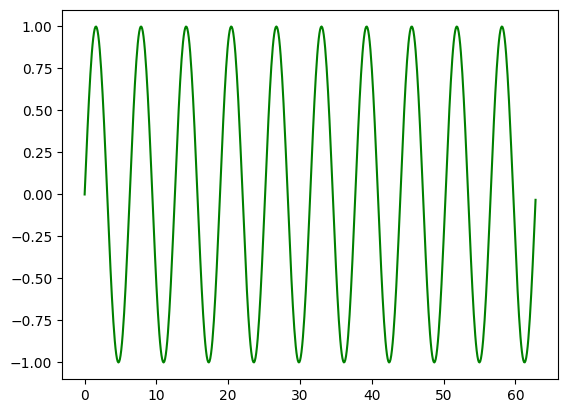

[ 0.00000000e+00  9.98334166e-02  1.98669331e-01  2.95520207e-01
  3.89418342e-01  4.79425539e-01  5.64642473e-01  6.44217687e-01
  7.17356091e-01  7.83326910e-01  8.41470985e-01  8.91207360e-01
  9.32039086e-01  9.63558185e-01  9.85449730e-01  9.97494987e-01
  9.99573603e-01  9.91664810e-01  9.73847631e-01  9.46300088e-01
  9.09297427e-01  8.63209367e-01  8.08496404e-01  7.45705212e-01
  6.75463181e-01  5.98472144e-01  5.15501372e-01  4.27379880e-01
  3.34988150e-01  2.39249329e-01  1.41120008e-01  4.15806624e-02
 -5.83741434e-02 -1.57745694e-01 -2.55541102e-01 -3.50783228e-01
 -4.42520443e-01 -5.29836141e-01 -6.11857891e-01 -6.87766159e-01
 -7.56802495e-01 -8.18277111e-01 -8.71575772e-01 -9.16165937e-01
 -9.51602074e-01 -9.77530118e-01 -9.93691004e-01 -9.99923258e-01
 -9.96164609e-01 -9.82452613e-01 -9.58924275e-01 -9.25814682e-01
 -8.83454656e-01 -8.32267442e-01 -7.72764488e-01 -7.05540326e-01
 -6.31266638e-01 -5.50685543e-01 -4.64602179e-01 -3.73876665e-01
 -2.79415498e-01 -1.82162

In [70]:
x = np.arange(0,20*np.pi,0.1)
sinus = np.sin(x)
plt.plot(x, sinus, color='green')
plt.show()


In [77]:
import numpy as np
import pandas as pd

# Generate date range
start_date = '2024-01-01'
end_date = '2026-12-31'
dates = pd.date_range(start=start_date, end=end_date)

# Generate sinusoidal data
amplitude = 1  # Amplitude of the sinusoidal wave
frequency = 0.1  # Frequency of the sinusoidal wave
phase = 0  # Phase shift of the sinusoidal wave
sinusoidal_data = amplitude * np.sin(2 * np.pi * frequency * np.arange(len(dates)) + phase)

# Create DataFrame
df = pd.DataFrame({'Date': dates, 'Sinusoidal_Value': sinusoidal_data})

# Optionally, you can save this DataFrame to a CSV file
#df.to_csv('sinusoidal_data.csv', index_col = 'Date')

print(df.head())


        Date  Sinusoidal_Value
0 2024-01-01          0.000000
1 2024-01-02          0.587785
2 2024-01-03          0.951057
3 2024-01-04          0.951057
4 2024-01-05          0.587785


In [79]:
sinus_model.index.freq = 'D'

sinus_model = ExponentialSmoothing(df['Sinusoidal_Value'],trend='add',seasonal='add',seasonal_periods=12).fit()

predictions_sinus = sinus_model.forecast(12)

plt.figure(figsize=(20, 10))  # Set the size of the plot

# Plot the training data
sinus_model['Sinusoidal_Value'].plot(legend=True, label='TRAIN')

# Plot the test data
test_health['Sinusoidal_Value'].plot(legend=True, label='PREDICTION')



plt.title('Train, Test and Predicted Test using Holt Winters')
plt.show()  # Show the plot


TypeError: 'HoltWintersResultsWrapper' object is not subscriptable

<Figure size 2000x1000 with 0 Axes>